<a href="https://colab.research.google.com/github/bdarshana11/Fake-news-detection-/blob/main/Fakenews_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake news detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read datasets

In [ ]:
from google.colab import files
uploaded = files.upload()

fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")


Saving Fake.csv to Fake.csv
Saving True.csv to True.csv


In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

## Data cleaning and preparation

In [ ]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
# Check the data
data.head()

,title,text,subject,date,target
0,ACTOR WHO BLEW THROUGH $150 Million Fortune Is...,"LOL! If I was Cage s manager, I d suggest he s...",politics,"Dec 28, 2016",fake
1,UK Brexit bill not scheduled for debate in par...,LONDON (Reuters) - Britain s parliament will n...,worldnews,"October 19, 2017",true
2,France should know that Iran's missiles are no...,BEIRUT (Reuters) - France should know that Ira...,worldnews,"December 4, 2017",true
3,Senate to debate Puerto Rico debt bill: McConnell,WASHINGTON (Reuters) - The U.S. Senate this mo...,politicsNews,"June 14, 2016",true
4,ULTIMATE HYPOCRITES! RUSSIAN Ambassador Visite...,"According to the New Yorker, Bill Clinton rece...",left-news,"Mar 3, 2017",fake


In [ ]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,ACTOR WHO BLEW THROUGH $150 Million Fortune Is...,"LOL! If I was Cage s manager, I d suggest he s...",politics,fake
1,UK Brexit bill not scheduled for debate in par...,LONDON (Reuters) - Britain s parliament will n...,worldnews,true
2,France should know that Iran's missiles are no...,BEIRUT (Reuters) - France should know that Ira...,worldnews,true
3,Senate to debate Puerto Rico debt bill: McConnell,WASHINGTON (Reuters) - The U.S. Senate this mo...,politicsNews,true
4,ULTIMATE HYPOCRITES! RUSSIAN Ambassador Visite...,"According to the New Yorker, Bill Clinton rece...",left-news,fake


In [ ]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,"LOL! If I was Cage s manager, I d suggest he s...",politics,fake
1,LONDON (Reuters) - Britain s parliament will n...,worldnews,true
2,BEIRUT (Reuters) - France should know that Ira...,worldnews,true
3,WASHINGTON (Reuters) - The U.S. Senate this mo...,politicsNews,true
4,"According to the New Yorker, Bill Clinton rece...",left-news,fake


In [ ]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,"lol! if i was cage s manager, i d suggest he s...",politics,fake
1,london (reuters) - britain s parliament will n...,worldnews,true
2,beirut (reuters) - france should know that ira...,worldnews,true
3,washington (reuters) - the u.s. senate this mo...,politicsNews,true
4,"according to the new yorker, bill clinton rece...",left-news,fake


In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
# Check
data.head()

,text,subject,target
0,lol if i was cage s manager i d suggest he shu...,politics,fake
1,london reuters britain s parliament will not ...,worldnews,true
2,beirut reuters france should know that iran s...,worldnews,true
3,washington reuters the us senate this month w...,politicsNews,true
4,according to the new yorker bill clinton recei...,left-news,fake


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,subject,target
0,lol cage manager suggest shut mouth actthink m...,politics,fake
1,london reuters britain parliament discuss key ...,worldnews,true
2,beirut reuters france know iran missile progra...,worldnews,true
3,washington reuters us senate month debate legi...,politicsNews,true
4,according new yorker bill clinton received 500...,left-news,fake


## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


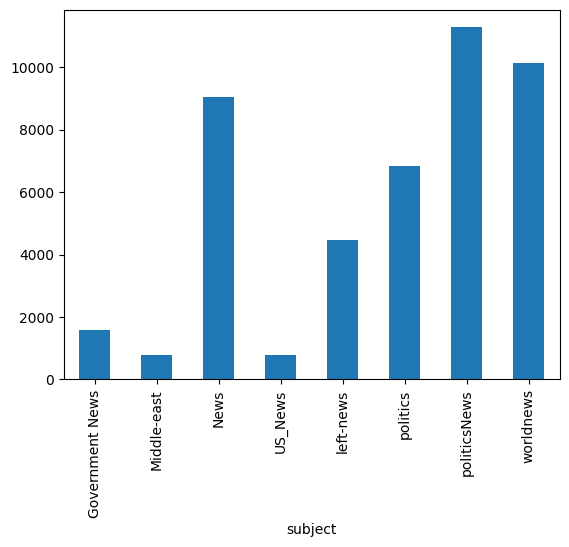

In [ ]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


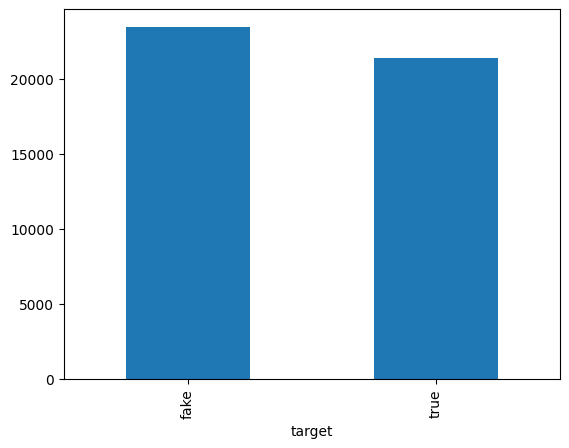

In [ ]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

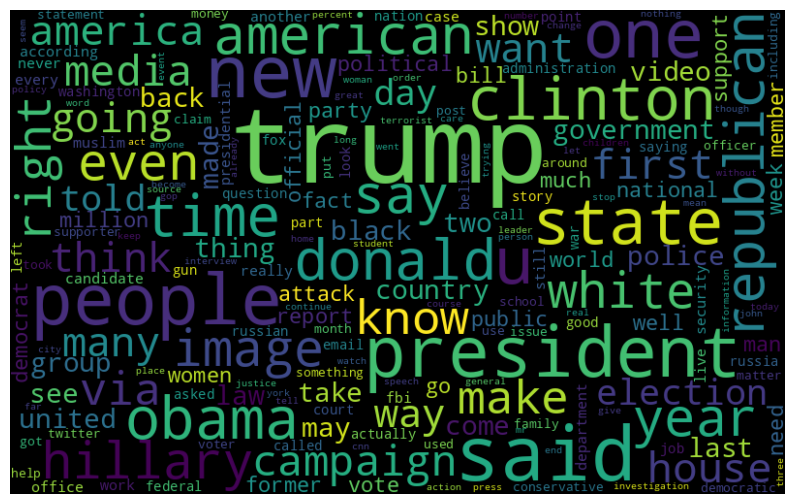

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

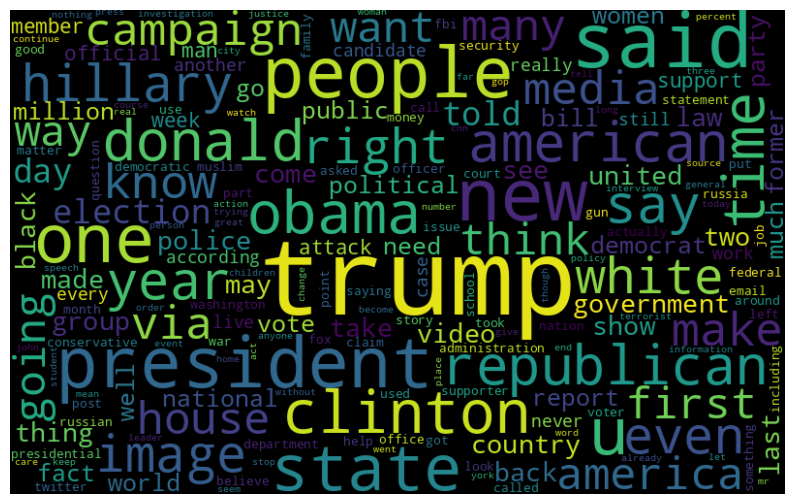

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

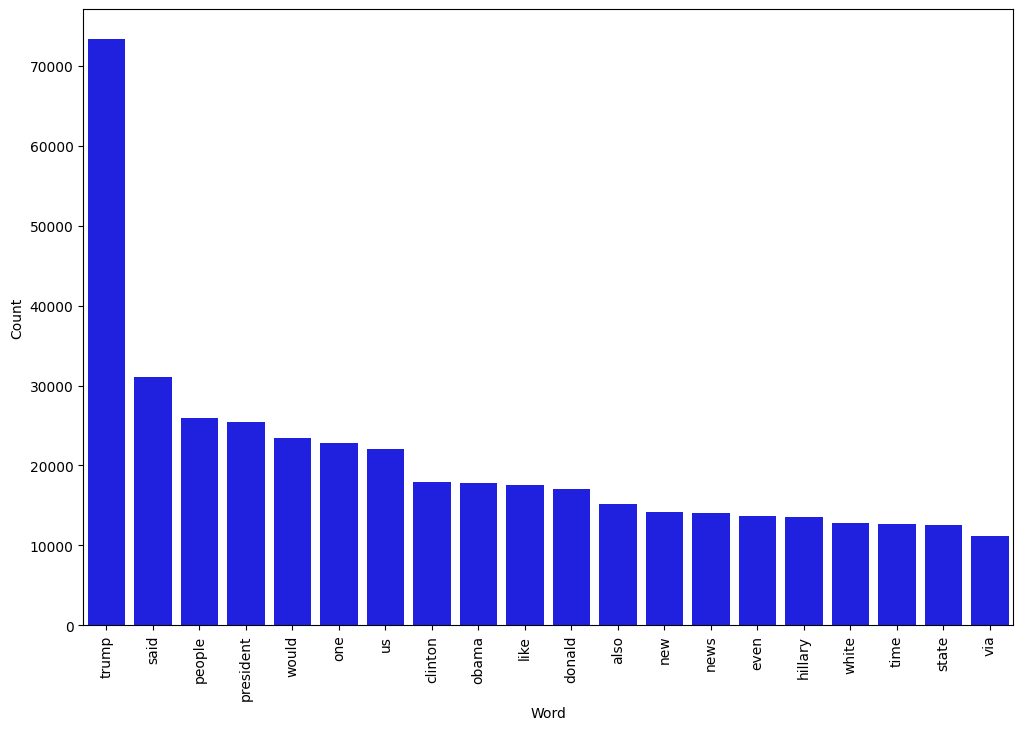

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

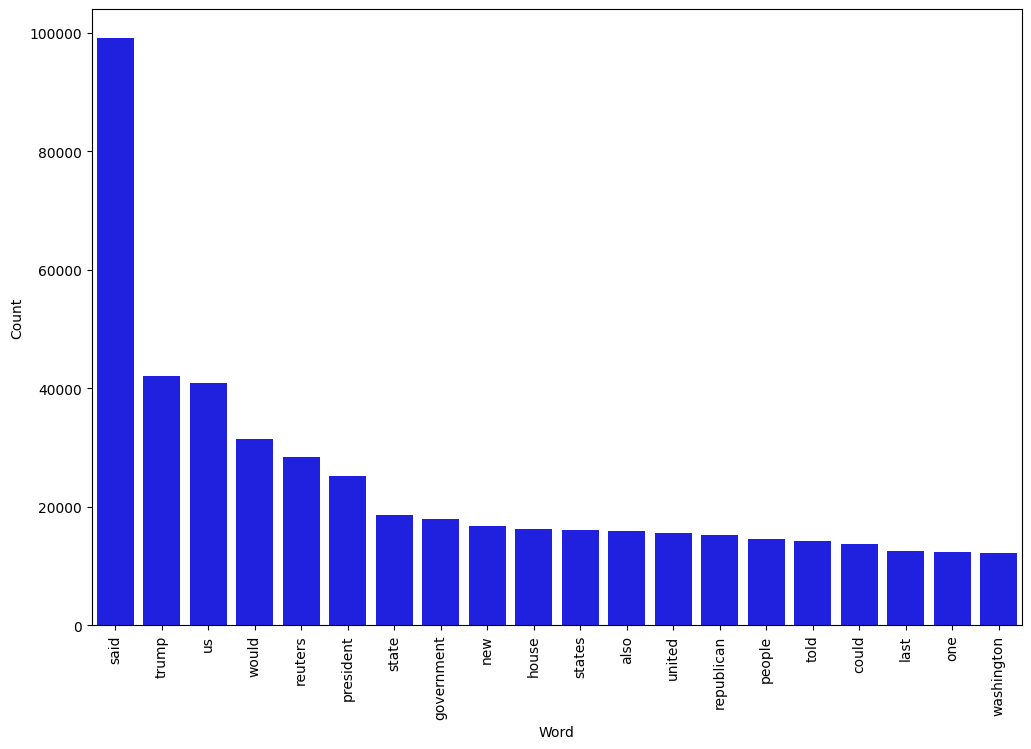

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modeling

In [ ]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Preparing the data

In [ ]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, f1_score

pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression())
])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Predictions
prediction = model.predict(X_test)

# Metrics
print("Accuracy: ", accuracy_score(y_test, prediction))
print("Precision Score: ", precision_score(y_test, prediction, average='macro'))
print("F1 Score: ", f1_score(y_test, prediction, average='macro'))


Accuracy:  0.9888641425389755
Precision Score:  0.988834090739775
F1 Score:  0.9888496272149756


Confusion matrix, without normalization


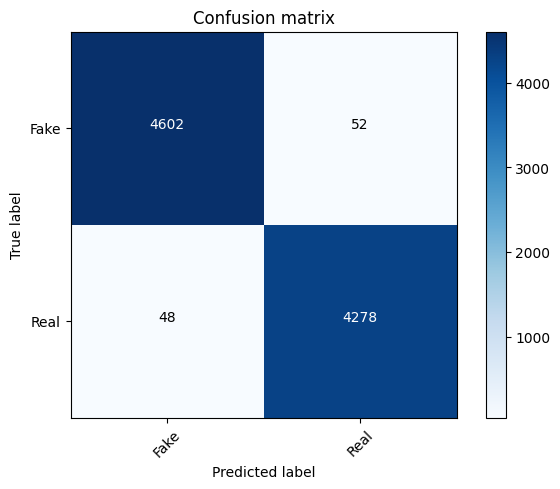

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Vectorizing and applying TF-IDF with Decision Tree Classifier
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', DecisionTreeClassifier(
        criterion='entropy',
        max_depth=20,
        splitter='best',
        random_state=42
    ))
])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Predictions
prediction = model.predict(X_test)

# Evaluation Metrics
print("Accuracy: ", accuracy_score(y_test, prediction))
print("Precision Score: ", precision_score(y_test, prediction, average='macro'))
print("F1 Score: ", f1_score(y_test, prediction, average='macro'))


Accuracy:  0.9959910913140312
Precision Score:  0.9959938495601948
F1 Score:  0.995985670203585


Confusion matrix, without normalization


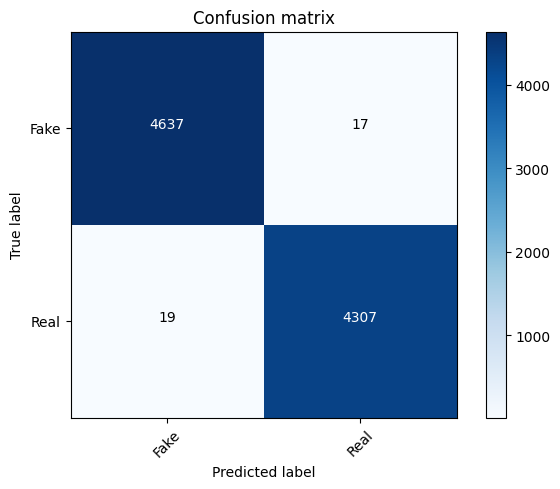

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, f1_score, precision_score

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction, average='weighted')  # Use 'binary' for binary classification
precision = precision_score(y_test, prediction, average='weighted')  # Use 'binary' for binary classification

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)

Accuracy: 0.9878619153674832
F1 Score: 0.9878628001246568
Precision: 0.9878725385179092


Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Linear SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm, pos_label='true')
recall = recall_score(y_test, y_pred_svm, pos_label='true')
f1 = f1_score(y_test, y_pred_svm, pos_label='true')

print(f"SVM Accuracy: {accuracy:}")
print(f"SVM Precision: {precision:}")
print(f"SVM F1 Score: {f1:}")


SVM Accuracy: 0.9955456570155902
SVM Precision: 0.994919168591224
SVM F1 Score: 0.9953789279112755


Naives Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Naïve Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb, pos_label='true')
recall = recall_score(y_test, y_pred_nb, pos_label='true')
f1 = f1_score(y_test, y_pred_nb, pos_label='true')

print(f"Naïve Bayes Accuracy: {accuracy:}")
print(f"Naïve Bayes Precision: {precision:}")
print(f"Naïve Bayes F1 Score: {f1:}")


Naïve Bayes Accuracy: 0.948663697104677
Naïve Bayes Precision: 0.9431323091034166
Naïve Bayes F1 Score: 0.9469321975365489


LSTM

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

#  Load Data (Update Paths If Needed)
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

#  Add Label Column
df_fake["label"] = 0  # Fake news → Label 0
df_true["label"] = 1  # True news → Label 1

#  Combine Data
df = pd.concat([df_fake, df_true], axis=0).sample(frac=1).reset_index(drop=True)  # Shuffle

#  Split Data
X = df["text"].astype(str)  # Ensure text is string
y = df["label"].astype(int)  # Ensure labels are integers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

#  Padding Sequences
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

#  LSTM Model
model = Sequential([
    Embedding(input_dim=5000, output_dim=128),
    SpatialDropout1D(0.2),
    LSTM(100, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#  Train the LSTM model
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test), verbose=1)

#  Evaluate LSTM Model
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype("int32").flatten()

#  Calculate Metrics
accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)

print(f"LSTM Accuracy: {accuracy:}")
print(f"LSTM Precision: {precision:}")
print(f"LSTM F1 Score: {f1:}")


Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 164s 284ms/step - accuracy: 0.9254 - loss: 0.2043 - val_accuracy: 0.9830 - val_loss: 0.0590
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 195s 272ms/step - accuracy: 0.9827 - loss: 0.0532 - val_accuracy: 0.9792 - val_loss: 0.0635
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 202s 272ms/step - accuracy: 0.9894 - loss: 0.0340 - val_accuracy: 0.9881 - val_loss: 0.0452
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 223s 310ms/step - accuracy: 0.9931 - loss: 0.0222 - val_accuracy: 0.9903 - val_loss: 0.0406
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 184s 278ms/step - accuracy: 0.9952 - loss: 0.0157 - val_accuracy: 0.9859 - val_loss: 0.0495
281/281 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step
LSTM Accuracy: 0.9858574610244989
LSTM Precision: 0.993413314514232
LSTM F1 Score: 0.9851860492243089


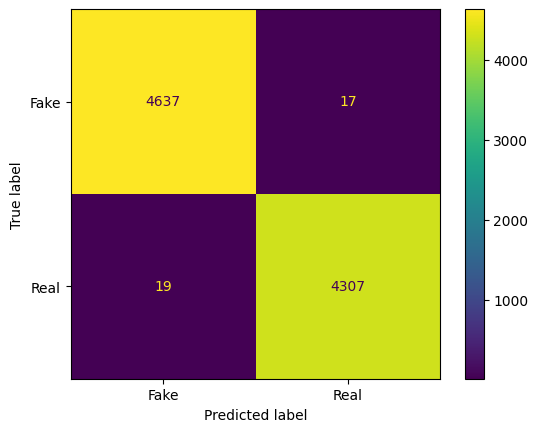

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real']).plot()
plt.show()
